## Improving inventory and sales management and optimizing sales performance


### Importing Libraies

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('Warehouse_and_Retail_Sales.csv')
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


## Data Understanding

In [3]:
df.shape

(307645, 9)

In [4]:
df['YEAR'].unique()

array([2020, 2017, 2018, 2019], dtype=int64)

In [5]:
df['YEAR'].value_counts().sort_values()

YEAR
2018     26445
2020     46278
2017     96284
2019    138638
Name: count, dtype: int64

In [6]:
df.head(2)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.0,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.0,1.0,4.0


### This Data Contains four years details with 307645 rows and 9 columns

## Understanding the Columns
1. Year: The year, the sales transfers, and warehouse activities occurred.
2. Month: The month corresponding to the year in which the sales transfers and warehouse activities occurred.
3. Supplier: This column identifies the name of the supplier who distributes the item
4. Item Code: The unique identifier for each item and product distributed
5. Item Description: This column provides a description Name of the item and product.
6. Item Type: The category of the item based on its product type.
7. Retail Sales: This column represents the quantity of items sold at retail locations.
8. Retail Transfers: This column indicates the quantity of items transferred from the warehouse to retail locations.
9. Warehouse Sales: This column shows the quantity of items sold directly from the warehouse.

In [7]:
df.nunique()

YEAR                    4
MONTH                  12
SUPPLIER              396
ITEM CODE           34056
ITEM DESCRIPTION    34822
ITEM TYPE               8
RETAIL SALES        10674
RETAIL TRANSFERS     2504
WAREHOUSE SALES      4895
dtype: int64

## Data Cleaning

In [8]:
df2 = df.copy()

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


### Clean the Year and Month Column
* change the datatype
* format and replace the month number with the month name

In [10]:
# change the datatype from int to str

df2['YEAR'] = df2['YEAR'].astype(str)

df2['MONTH'] = df2['MONTH'].astype(str)

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  object 
 1   MONTH             307645 non-null  object 
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), object(6)
memory usage: 21.1+ MB


In [12]:
# Replace the month number with the month name

df2['MONTH'] = df2['MONTH'].str.replace('1','January')
df2['MONTH'] = df2['MONTH'].str.replace('2','February')
df2['MONTH'] = df2['MONTH'].str.replace('3','March')
df2['MONTH'] = df2['MONTH'].str.replace('4','April')
df2['MONTH'] = df2['MONTH'].str.replace('5','May')
df2['MONTH'] = df2['MONTH'].str.replace('6','June')
df2['MONTH'] = df2['MONTH'].str.replace('7','July')
df2['MONTH'] = df2['MONTH'].str.replace('8','August')
df2['MONTH'] = df2['MONTH'].str.replace('9','September')
df2['MONTH'] = df2['MONTH'].str.replace('10','October')
df2['MONTH'] = df2['MONTH'].str.replace('11','November')
df2['MONTH'] = df2['MONTH'].str.replace('12','December')
df2['MONTH'].unique()

array(['January', 'July', 'March', 'September', 'June', 'August',
       'JanuaryFebruary', 'January0', 'JanuaryJanuary', 'February',
       'April', 'May'], dtype=object)

##### 10 replace with January0, 11 replace with JanuaryJanuary, 12 replace with JanuaryFebruary

In [13]:
# Format the incorrect replace with the correct Month (October, November, December)

df2['MONTH'] = df2['MONTH'].str.replace('January0','October')
df2['MONTH'] = df2['MONTH'].str.replace('JanuaryJanuary','November')
df2['MONTH'] = df2['MONTH'].str.replace('JanuaryFebruary','December')
df2['MONTH'].unique()

array(['January', 'July', 'March', 'September', 'June', 'August',
       'December', 'October', 'November', 'February', 'April', 'May'],
      dtype=object)

In [14]:
df2.SUPPLIER.unique()

array(['REPUBLIC NATIONAL DISTRIBUTING CO', 'PWSWN INC',
       'RELIABLE CHURCHILL LLLP', 'LANTERNA DISTRIBUTORS INC',
       'DIONYSOS IMPORTS INC', 'KYSELA PERE ET FILS LTD',
       'SANTA MARGHERITA USA INC', 'BROWN-FORMAN BEVERAGES WORLDWIDE',
       'JIM BEAM BRANDS CO', 'INTERNATIONAL CELLARS LLC',
       'HEAVEN HILL DISTILLERIES INC', 'BACCHUS IMPORTERS LTD',
       'MONSIEUR TOUTON SELECTION',
       'THE COUNTRY VINTNER, LLC DBA WINEBOW', 'ROYAL WINE CORP',
       'STE MICHELLE WINE ESTATES', 'Default', 'SAZERAC CO',
       'SALVETO IMPORTS LLC', 'HUB WINE CORPORATION',
       'ALLAGASH BREWING COMPANY', 'CAMPARI AMERICA LLC',
       'PERNOD RICARD USA LLC', 'PRESTIGE BEVERAGE GROUP OF MD LLC',
       'BACARDI USA INC', 'YOUNG WON TRADING INC',
       'TROEGS BREWING COMPANY', 'CASTLE BRANDS USA CORP', 'LEGENDS LTD',
       'WASHBURN WINE CO', 'CELICAR LLC DBA TWIN VALLEY DISTILLERS',
       'DOPS INC', 'JACKSON FAMILY ENTERPRISES INC',
       'BUCK DISTRIBUTING COMPANY INC'

In [15]:
df2['ITEM DESCRIPTION'].value_counts().head(50)

ITEM DESCRIPTION
BURGANS ALBARINO - 750ML                      44
SANTA JULIA TORRONTES SUSTAINABLE - 750ML     39
LA VIELLE FERME CDV RED - 750ML               35
LINGANORE BLACK RAVEN - 750ML                 34
MCCLINTOCK HERITAGE WHITE WHISKEY - 750ML     33
LAS PERDICES VIOG - 750ML                     32
DAVID NICHOLSON 1843 BOURBON -750ML           32
MARIETTA OV RED - 750ML                       32
CA LUNGHETTA P/GRIG - 750ML                   32
THE WINERY AT OLNEY CHARD - 750ML             31
ELOUAN P/NOIR - 750ML                         31
DONA PAULA LOS CARDOS MAL - 750ML             31
PASOTE ANEJO TEQUILA - 750ML                  30
WOODFORD RESERVE KY STRAIT - 1.75L            30
ANGELINE RES CHARD - 750ML                    29
CHOPIN VODKA - 750ML                          29
STONESTREET ESTATE A/V CHARD - 750ML          29
PONGA S/BLC - 750ML                           28
U MES U FAN CAVA BRUT - 750ML                 28
BARON HERZOG CAB JEUNESSE - 750ML             28
JAM

In [16]:
df2['ITEM TYPE'].unique()

array(['WINE', 'BEER', 'LIQUOR', 'STR_SUPPLIES', 'KEGS', 'REF', 'DUNNAGE',
       'NON-ALCOHOL', nan], dtype=object)

In [17]:
df2['ITEM TYPE'].value_counts()

ITEM TYPE
WINE            187640
LIQUOR           64910
BEER             42413
KEGS             10146
NON-ALCOHOL       1908
STR_SUPPLIES       405
REF                127
DUNNAGE             95
Name: count, dtype: int64

In [18]:
df2.head(3)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,January,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.0,0.0,2.0
1,2020,January,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.0,1.0,4.0
2,2020,January,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.0,0.0,1.0


## EDA

In [19]:
df3 = df2.copy()

In [20]:
df3.isnull().sum()

YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

##### Insights on missing values:
1. It was indicate that 167 name of our supplier is missing
2. Also 1 Category Item Type is missing
3. Also 3 quantity of items sold at retail Sales is missing

## ANALYSIS TO PERFORM:
Inventory Optimization:
1. what is the Total, average, and max quantity sold in Retails and Warehouse Sales?
2. What is the total, quantity sold in Retails and Warehouse Sales?
3. What is the yearly quantity for (RETAIL SALES), transfers (RETAIL TRANSFERS), and warehouse sales (WAREHOUSE SALES)?
4. What is the Monthly quantity for (RETAIL SALES), transfers (RETAIL TRANSFERS), and warehouse sales (WAREHOUSE SALES) for each Year?

In [21]:
df3.head(2)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,January,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.0,0.0,2.0
1,2020,January,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.0,1.0,4.0


### 1. what is the total, average and max quantity sold in Retails and Warehouse Sales

In [22]:
# 1a. what is the total, average and max quantity sold in Retails Sales

avg_retail = df3.groupby('ITEM TYPE')['RETAIL SALES'].agg(['mean','max','sum'])
avg_retail

,mean,max,sum
ITEM TYPE,,,
BEER,13.538786,1494.00,574220.53
DUNNAGE,0.000000,0.00,0.00
KEGS,0.000000,0.00,0.00
LIQUOR,12.366221,1816.49,802691.43
NON-ALCOHOL,17.892026,2739.00,34084.31
REF,5.225433,36.00,663.63
STR_SUPPLIES,6.767605,368.64,2740.88
WINE,3.978355,813.84,746498.59


* IN Retail Sales The total quantity of Beer sold is 574220.5 quantity, the maximum is 1490 quantity and the average is 13.5 quantity
* DUNNAGE and Kegs Items don't have any sales
* The total quantity of Liquor sold is 802691 quantity, the Maximum is 1816 and the Average is 12 Quantity
* Non-alcohol has a total of 34084 quantity sold, the maximum is 2739 quantity, and the Average is 17.8 quantity
* Ref has a total of 663.6 quantities sold, the maximum is 36 quantities, and the average is 5 quantities
* The total quantity of Str_Supplies sold is 2740.8 quantity, the Maximum is 368.8 and the Average is 6.7 Quantity
* The total quantity of Wine sold is 746498.5 quantity, the Maximum is 813.8 and the Average is 3.9 Quantity

Text(0, 0.5, 'Average Quantity Sold')

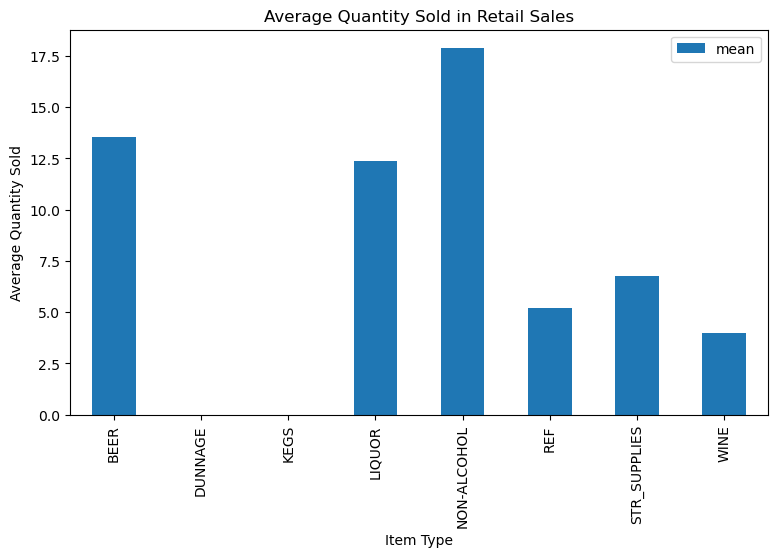

In [23]:
# (1ai). what is the average sold in Retails Sales

avg_retail = df3.groupby('ITEM TYPE')['RETAIL SALES'].agg(['mean'])
avg_retail.plot.bar(figsize =(9,5))
plt.title('Average Quantity Sold in Retail Sales')
plt.xlabel('Item Type')
plt.ylabel('Average Quantity Sold')

* DUNNAGE and Kegs Items don't have any quantity sold in retail Sales
* Non-alcohol has the most average quantity sold with 17.8 followed by Beer with 13.5 quantity sold
* Liquor has a moderate average sold with 12 quantities, followed by str_supplies with 6.7 quantities sold
* Ref has the lowest average sold with 5 quantities and Wine has 3.9 quantities Sold

Text(0, 0.5, 'Maximum Quantity Sold')

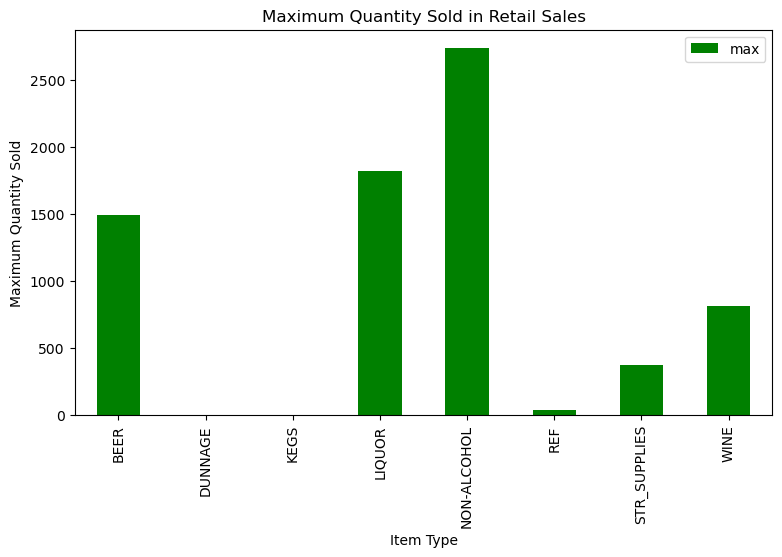

In [24]:
# (1aii). what is the maximum quantity sold in Retails Sales

avg_retail = df3.groupby('ITEM TYPE')['RETAIL SALES'].agg(['max'])
avg_retail.plot.bar(figsize =(9,5), color=('green'))
plt.title('Maximum Quantity Sold in Retail Sales')
plt.xlabel('Item Type')
plt.ylabel('Maximum Quantity Sold')

* DUNNAGE and Kegs Items don't have any quantity sold in retail Sales
* Non-alcohol has the highest maximum sold with 2739 quantity 
* Liquor has a moderate maximum sold with 1816 quantities, followed by Beer with 1494 quantities sold
* Wine has a low maximum sold with 813 quantities, followed by Str_Supplies with lower sold of 368 quantities 
* Ref has the lowest maximum sold with 36 quantities

Text(0, 0.5, 'Maximum Quantity Sold')

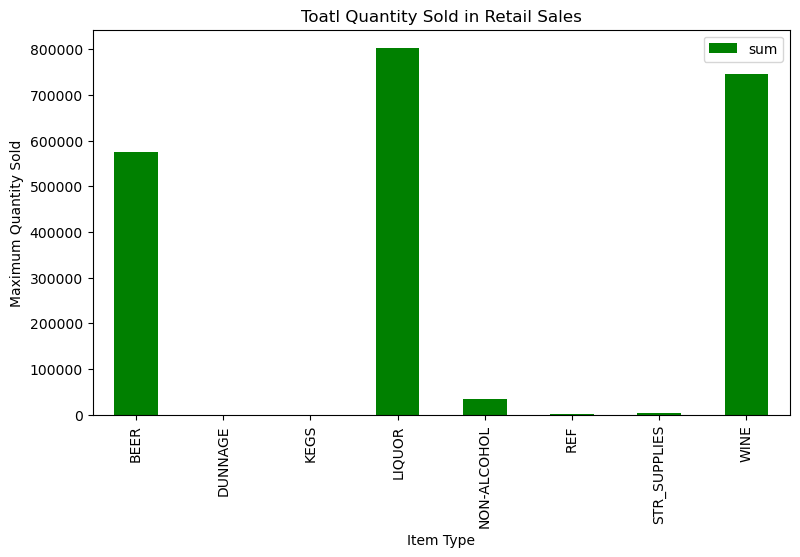

In [25]:
# (1aiii). what is the total quantity sold in Retails Sales

avg_retail = df3.groupby('ITEM TYPE')['RETAIL SALES'].agg(['sum'])
avg_retail.plot.bar(figsize =(9,5), color=('green'))
plt.title('Toatl Quantity Sold in Retail Sales')
plt.xlabel('Item Type')
plt.ylabel('Maximum Quantity Sold')

* DUNNAGE and Kegs Items don't have any quantity sold in retail Sales
* Liquor has the highest total sold with 802691 quantities, followed by Wine with 746498.5 quantities sold
* Beer has a moderate total sold with 574220 quantities
* Non-alcohol has a low total sold with 34084 quantities, followed by Str_Supplies with lower sold of 2740 quantities 
* Ref has the lowest total sold with 663 quantities

In [26]:
# 1b. what is the total, average and max quantity sold in Warehouse Sales

avg_warehouse = df3.groupby('ITEM TYPE')['WAREHOUSE SALES'].agg(['mean','max','sum'])
avg_warehouse

,mean,max,sum
ITEM TYPE,,,
BEER,153.897072,18317.0,6527236.51
DUNNAGE,-1278.463158,-1.0,-121454.00
KEGS,11.672679,604.0,118431.00
LIQUOR,1.462121,438.0,94906.27
NON-ALCOHOL,13.705236,297.0,26149.59
REF,-161.409449,298.0,-20499.00
STR_SUPPLIES,0.000000,0.0,0.00
WINE,6.165982,662.0,1156984.91


#### IN Warehouse Sales 
* The total quantity of Beer sold is 6527236.5 quantity, the maximum is 183170 quantity and the average is 15.3 quantity
* Dunnage sold in debit with the total quantity of (-121454), the maximum debit is (-1) quantity, and the average debt is (-1278) quantity
* The total quantity of Kegs sold is 118431 quantity, the maximum is 604 quantity and the average is 11.6 quantity
* The total quantity of Liquor sold is 94906 quantity, the Maximum is 438 and the Average is 1.4 Quantity
* Non-alcohol has a total of 26149.5 quantity sold, the maximum is 297 quantity, and the Average is 13.7 quantity
* Ref has a debit of total sold (-20499) quantities, the maximum is 298 quantities, and the average debt is (-161) quantities
* Str_supplies Items don't have any quantity sold in Warehouse Sales
* The total quantity of Wine sold is 1156984.9 quantity, the Maximum is 662 and the Average is 6 Quantity

In [27]:
# inspect the Warehouse sales column

warehouse_sale = df3[['ITEM TYPE','WAREHOUSE SALES']]
warehouse_sale.query('`ITEM TYPE` in ["DUNNAGE","REF"]').head(20)

,ITEM TYPE,WAREHOUSE SALES
177,REF,0.0
405,DUNNAGE,-12.0
822,DUNNAGE,-3999.0
1011,DUNNAGE,-934.0
2310,DUNNAGE,-287.0
8434,REF,0.0
11985,REF,-1028.0
11986,REF,-77.0
12186,REF,0.0
12382,DUNNAGE,-2.0


<Axes: title={'center': 'Total Quantity Sold in Warehouse Sales'}, xlabel='Item Type', ylabel='Total Quantity Sold'>

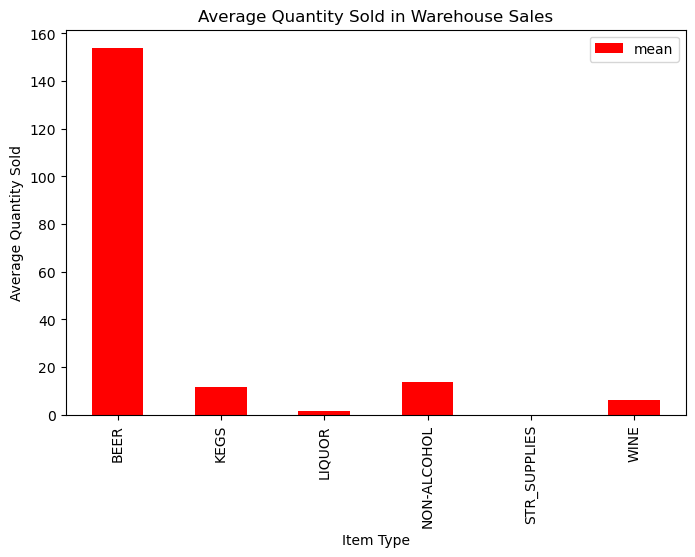

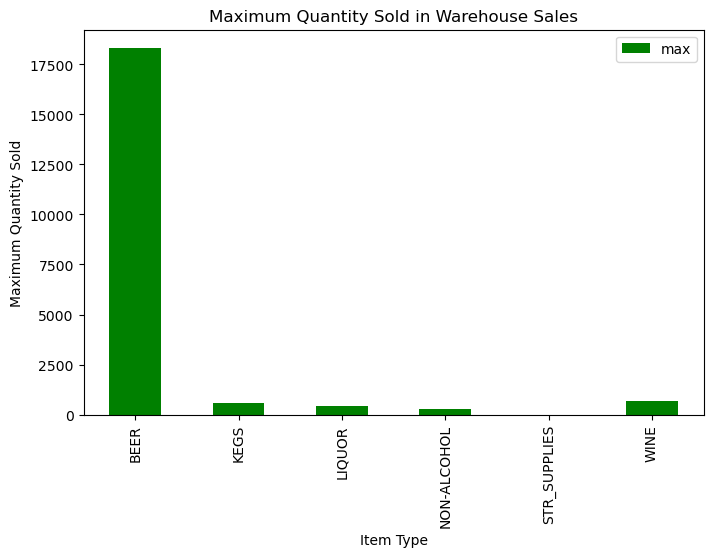

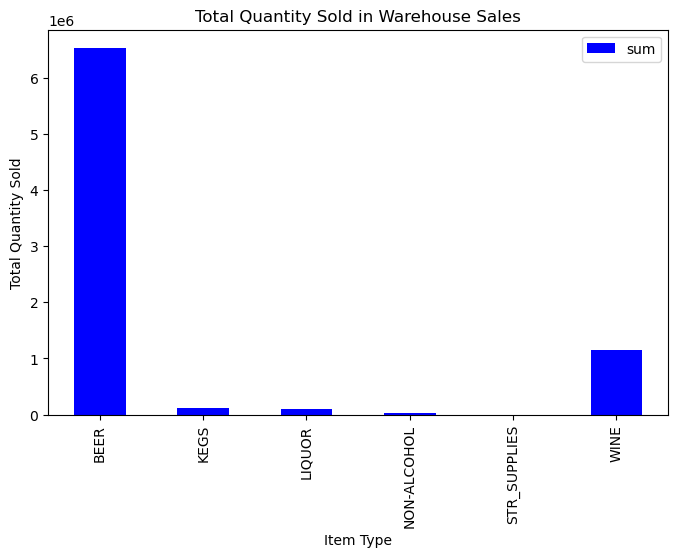

In [28]:
# (1bi). what is the Total, average and maximum quantity sold in the Warehouse

# Average Quantity Sold in Warehouse Sales
avg_warehouse = df3.groupby('ITEM TYPE')['WAREHOUSE SALES'].agg(['mean'])
avg_warehouse.query('`ITEM TYPE` not in ["DUNNAGE","REF"]')\
.plot.bar(figsize = (8,5), title = ('Average Quantity Sold in Warehouse Sales'),\
         xlabel = ('Item Type'),ylabel = ('Average Quantity Sold'),color = 'red')

# Maximum Quantity Sold in Warehouse Sales
avg_warehouse = df3.groupby('ITEM TYPE')['WAREHOUSE SALES'].agg(['max'])
avg_warehouse.query('`ITEM TYPE` not in ["DUNNAGE","REF"]')\
.plot.bar(figsize = (8,5), title = ('Maximum Quantity Sold in Warehouse Sales'),\
         xlabel = ('Item Type'),ylabel = ('Maximum Quantity Sold'), color = 'green')

# Total Quantity Sold in Warehouse Sales
avg_warehouse = df3.groupby('ITEM TYPE')['WAREHOUSE SALES'].agg(['sum'])
avg_warehouse.query('`ITEM TYPE` not in ["DUNNAGE","REF"]')\
.plot.bar(figsize = (8,5), title = ('Total Quantity Sold in Warehouse Sales'),\
         xlabel = ('Item Type'),ylabel = ('Total Quantity Sold'), color = 'blue')



* Bear as the highest Average, maximum, and total quantity sold at Warehouse
* The Other items Types contribute low to the Average, maximum, and total quantity sold at Warehouse

<Axes: title={'center': 'Total Quantity Sold in Debit at Warehouse'}, xlabel='Item Type', ylabel='Maximum Quantity Sold'>

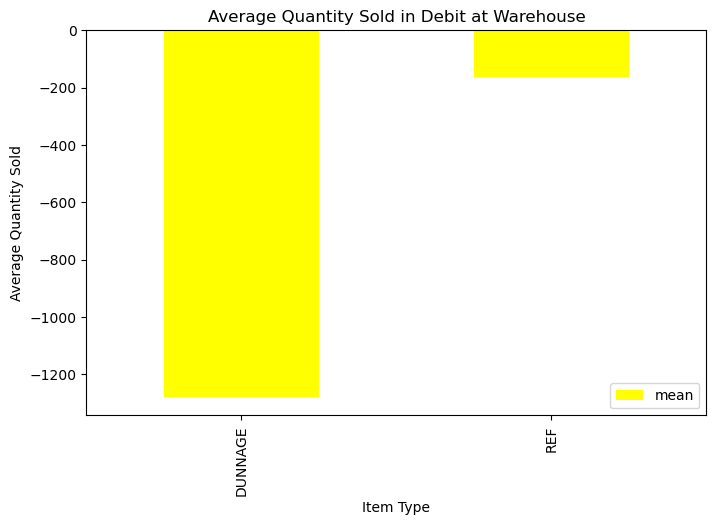

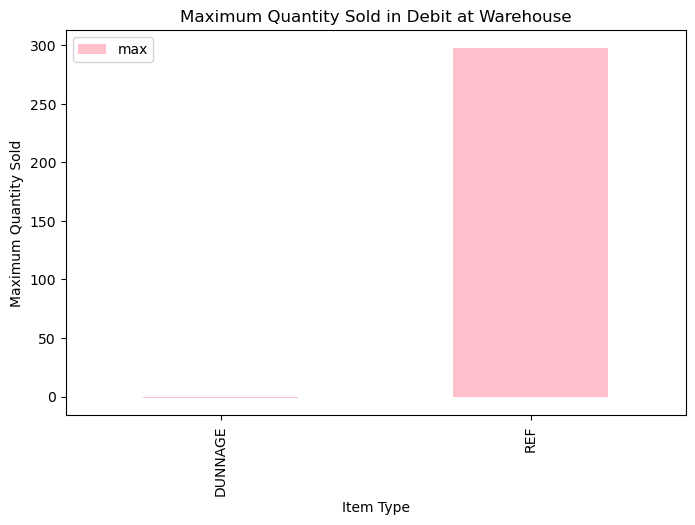

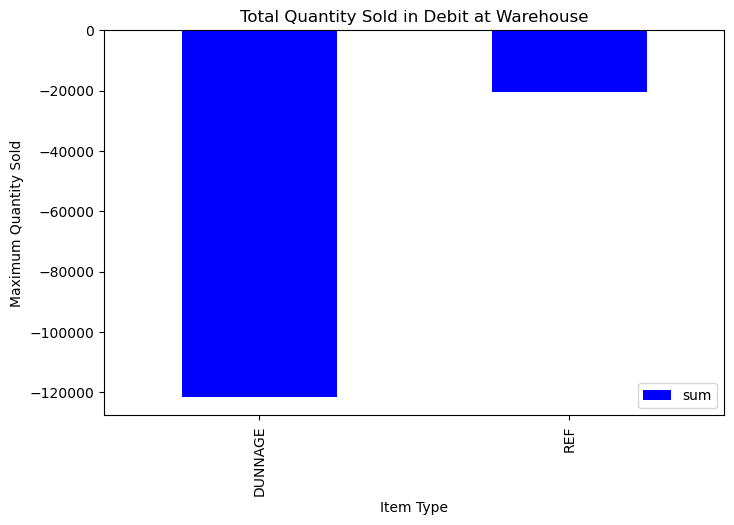

In [29]:
# (1bii). what is the average and maximum quantity sold Debit at Warehouse

# Average Quantity Sold in Debit at Warehouse
avg_warehouse = df3.groupby('ITEM TYPE')['WAREHOUSE SALES'].agg(['mean'])
avg_warehouse.query('`ITEM TYPE` in ["DUNNAGE","REF"]')\
.plot.bar(figsize = (8,5), title = ('Average Quantity Sold in Debit at Warehouse'),\
          xlabel = ('Item Type'),ylabel = ('Average Quantity Sold'), color = 'yellow')

# Maximum Quantity Sold in Debit at Warehouse
avg_warehouse = df3.groupby('ITEM TYPE')['WAREHOUSE SALES'].agg(['max'])
avg_warehouse.query('`ITEM TYPE` in ["DUNNAGE","REF"]')\
.plot.bar(figsize = (8,5),title = ('Maximum Quantity Sold in Debit at Warehouse'),\
        xlabel = ('Item Type'),ylabel = ('Maximum Quantity Sold'),color = 'pink')

# Total Quantity Sold in Debit at Warehouse
avg_warehouse = df3.groupby('ITEM TYPE')['WAREHOUSE SALES'].agg(['sum'])
avg_warehouse.query('`ITEM TYPE` in ["DUNNAGE","REF"]')\
.plot.bar(figsize = (8,5),title = ('Total Quantity Sold in Debit at Warehouse'),\
        xlabel = ('Item Type'),ylabel = ('Maximum Quantity Sold'),color = 'blue')


* Dunnage has the highest total, and average quantity sold in debt and has the lowest maximum quantity sold debt in the warehouse
* Ref has the lower average and total quantity sold in debt and has the moderate maximum that isn't sold in debt in the warehouse 

### 2. what is the total quantity sold in Retail Sales and Warehouse Sales

In [30]:
# (2ai) What is the total quantity sold in Retail Sales

retail_quantity_sold = df3['RETAIL SALES'].agg('sum')
print(f'The told Quantity sold in Retail Sales for four years is: {retail_quantity_sold}')

The told Quantity sold in Retail Sales for four years is: 2160899.37


In [31]:
# (2aii) what is the total quantity sold in Warehouse Sales

warehouse_quantity_sold = df3['WAREHOUSE SALES'].agg('sum')
print(f'The told Quantity sold in Warehouse Sales for four years is: {warehouse_quantity_sold}')

The told Quantity sold in Warehouse Sales for four years is: 7781756.280000001


#### 3.calculate yearly quantity for (RETAIL SALES), transfers (RETAIL TRANSFERS), and warehouse sales (WAREHOUSE SALES).

In [32]:
year_sale = df3.groupby('YEAR')[['RETAIL SALES','RETAIL TRANSFERS','WAREHOUSE SALES']].agg('sum')
year_sale

,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
YEAR,,,
2017,686734.57,676620.50,2333849.13
2018,153595.90,153652.92,519526.19
2019,960191.20,957562.40,3543371.23
2020,360377.70,346132.81,1385009.73


<Axes: title={'center': 'Yearly Quantity Retail Sales Retail Transfers and Warehouse'}, xlabel='YEAR'>

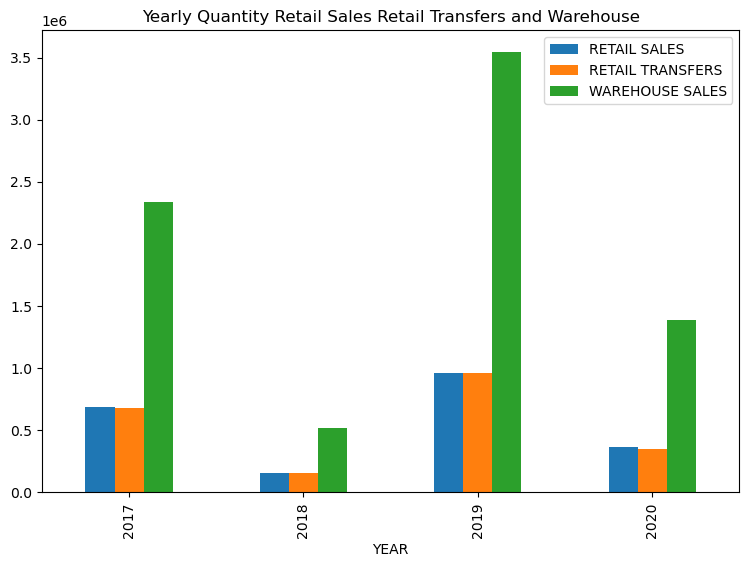

In [33]:
year_sale.plot.bar(title = 'Yearly Quantity Retail Sales Retail Transfers and Warehouse', figsize = (9,6))

* Throughout the Year Warehouse sales have the highest quantity sold
* Retail sales and Retail Transfers have a moderate  quantity sold
* 2018 has the lowest quantity sold
* In 2019 warehouse had the highest quantity sold, followed by 2017, 2020, and 2018
* In 2019 Retail sales and Retail Transfers had a moderate quantity sold, followed by 2017, 2020, and 2018

#### 4. What is the Monthly quantity for (RETAIL SALES), transfers (RETAIL TRANSFERS), and warehouse sales (WAREHOUSE SALES) for each year.

In [34]:
df3.head(3)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,January,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.0,0.0,2.0
1,2020,January,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.0,1.0,4.0
2,2020,January,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.0,0.0,1.0


In [35]:
df3['YEAR'].value_counts()

YEAR
2019    138638
2017     96284
2020     46278
2018     26445
Name: count, dtype: int64

In [36]:
# use filter to query 2017 come out

year2017 = df3[df['YEAR'] == 2017]
year2017.sample(4)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
132279,2017,December,CLIPPER CITY BREWING CO,3140,HEAVY SEAS PEG LEG STOUT 4/6NR - 12OZ,BEER,32.33,35.0,58.96
84327,2017,August,LUXCO SPIRITED BRANDS,79758,LIONELLO STOCK ITALIAN SWEET VERMOUTH - 1.5L,WINE,6.41,8.0,0.00
74654,2017,August,LEGENDS LTD,23559,BUTTERNUT HENNIEWEISSEN 4/6 CANS - 12OZ,BEER,0.00,0.0,1.00
93266,2017,September,CONSTANTINE WINES INC,347911,CUVEE JEAN PAUL GASCOGNE ROSE 750 ML,WINE,0.00,0.0,1.00


In [37]:
# check how many unique Months we have in 2017

year2017['MONTH'].unique()

array(['June', 'July', 'August', 'December', 'September', 'October',
       'November'], dtype=object)

* There is only 7 column in 2017 get supply

In [38]:
# Calculate your the Monthly Total quantity sold in 2017

year2017 = year2017.groupby('MONTH')[['RETAIL SALES','RETAIL TRANSFERS','WAREHOUSE SALES']].agg('sum')
year2017

,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
MONTH,,,
August,87111.78,89486.43,382186.69
December,131634.49,121129.51,306957.22
July,92625.29,89083.25,316853.29
June,97357.26,94720.00,379390.83
November,98316.19,103230.96,339305.66
October,89236.96,93035.97,303714.91
September,90452.60,85934.38,305440.53


<Axes: title={'center': '2017 Monthly Total Quantity Sold for RETAIL, TRANSFERS, and WAREHOUSE'}, xlabel='MONTH'>

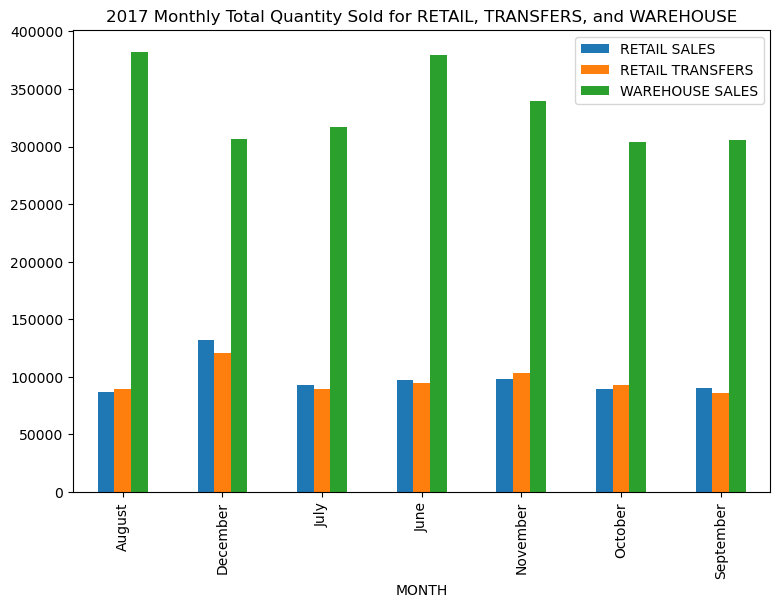

In [39]:
# visulize it

year2017.plot.bar(figsize =(9,6),
        title = ('2017 Monthly Total Quantity Sold for RETAIL, TRANSFERS, and WAREHOUSE'))

* In 2017 Month Warehouse sales had the highest quantity sold
* Retail sales and Retail Transfers have a moderate quantity sold

In [40]:
# use filter to query 2018 come out

year2018 = df3[df['YEAR'] == 2018]
year2018.sample(4)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
159360,2018,February,E & J GALLO WINERY,311839,TALBOTT SLEEPY HOLLOW P/NOIR - 750ML,WINE,0.91,0.0,0.00
152227,2018,January,PALM BAY IMPORTS,66125,CAVIT P/GRIG - 1.5L,WINE,99.75,64.0,122.83
156439,2018,February,MONSIEUR TOUTON SELECTION,155020,MAPRECO VINHO VERDE - 750ML,WINE,0.00,0.0,2.00
156088,2018,February,LEGENDS LTD,12236,LONG TRAIL BLAZE BOX - 12.OZ 2/12 NR,BEER,1.50,6.0,0.00


In [41]:
# check how many unique Month we have in 2018

year2018['MONTH'].unique()

array(['January', 'February'], dtype=object)

In [42]:
# Calculate your the Monthly Total quantity sold in 2018

year2018 = year2018.groupby('MONTH')[['RETAIL SALES','RETAIL TRANSFERS','WAREHOUSE SALES']].agg('sum')
year2018

,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
MONTH,,,
February,77804.13,79256.78,265008.52
January,75791.77,74396.14,254517.67


* There is only 2 months in 2018 get supply

<Axes: title={'center': '2018 Monthly Total Quantity for RETAIL, TRANSFERS, and WAREHOUSE'}, xlabel='MONTH'>

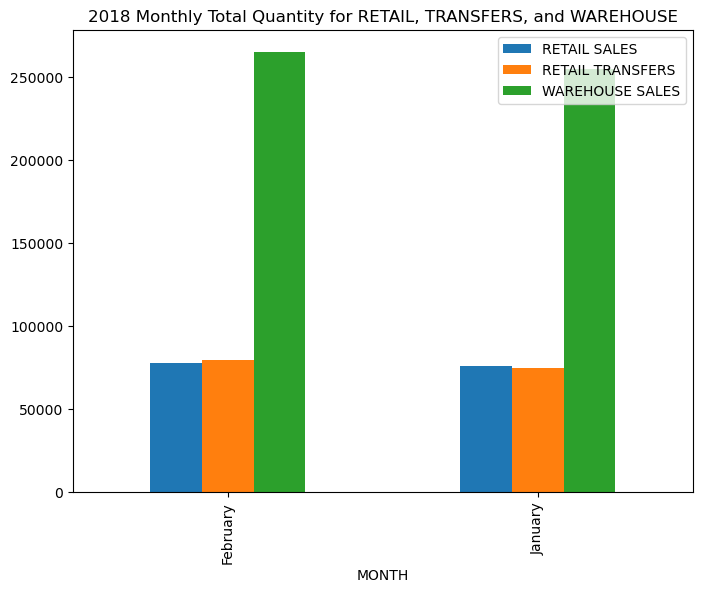

In [43]:
# visulize it

year2018.plot.bar(figsize =(8,6),
        title = ('2018 Monthly Total Quantity for RETAIL, TRANSFERS, and WAREHOUSE'))

* In 2018 Month Warehouse sales had the highest quantity sold
* Retail sales and Retail Transfers have a moderate quantity sold

In [44]:
# use filter to query 2019 come out

year2019 = df3[df['YEAR'] == 2019]
year2019.sample(4)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
253179,2019,July,LEGENDS LTD,63115,ANCHOR FOG BREAKER 4/6 NR,BEER,0.00,0.0,6.0
258905,2019,August,DOPS INC,26447,UINTA HOP NOTCH IPA 4/6 CANS - 12OZ,BEER,0.75,1.0,3.0
245982,2019,July,SOUTHERN GLAZERS WINE AND SPIRITS,238076,OLE SMOKY MOONSHINE PICKLES - 750ML,LIQUOR,12.05,48.0,0.0
265032,2019,August,MILLER BREWING COMPANY,51051,CAPE LINE 2/12 PK 12OZ VARIETY PACK CAN,BEER,49.50,36.0,89.0


In [45]:
# check how many unique Months we have in 2019

year2019['MONTH'].unique()

array(['January', 'November', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October'], dtype=object)

* In 2019 There are 11 Months get supply

In [46]:
# Calculate your the Monthly Total quantity sold in 2019

year2019 = year2019.groupby('MONTH')[['RETAIL SALES','RETAIL TRANSFERS','WAREHOUSE SALES']].agg('sum')
year2019

,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
MONTH,,,
April,80342.58,83633.90,298840.87
August,90628.61,88873.70,349603.09
February,80113.54,72415.98,248587.68
January,76100.53,76295.63,280381.24
July,90763.48,101509.34,374971.48
June,90860.39,85743.73,346587.08
March,84441.04,91321.61,293260.72
May,94953.10,88056.80,383791.58
November,101631.31,97169.75,299098.44


<Axes: title={'center': '2019 Monthly Total Quantity for RETAIL, TRANSFERS, and WAREHOUSE'}, xlabel='MONTH'>

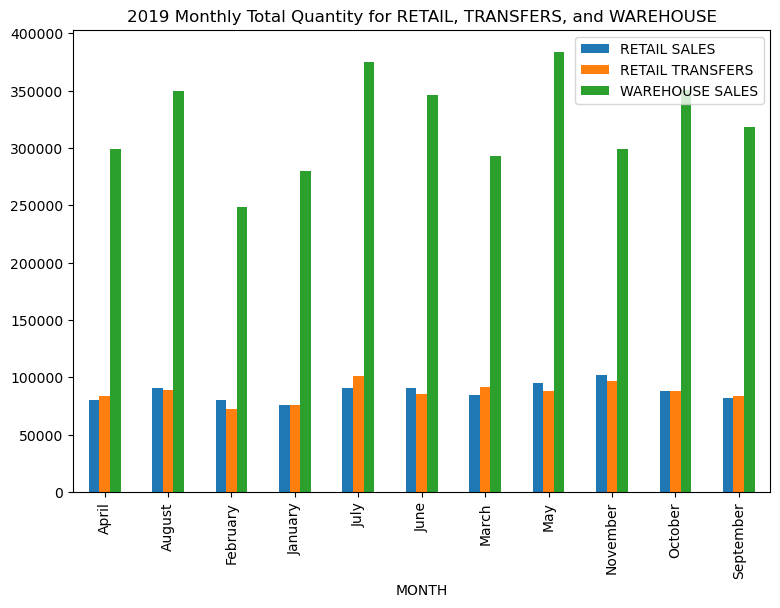

In [47]:
# visulize it

year2019.plot.bar(figsize =(9,6),
        title = ('2019 Monthly Total Quantity for RETAIL, TRANSFERS, and WAREHOUSE'))

* In 2019 Month Warehouse sales had the highest quantity sold
* Retail sales and Retail Transfers have a moderate quantity sold

In [48]:
# use filter to query 2020 come out

year2020 = df3[df['YEAR'] == 2020]
year2020.sample(4)

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
22620,2020,July,E & J GALLO WINERY,85697,DARK HORSE S/BLC - CAN - 375ML,WINE,8.09,7.0,9.0
18960,2020,July,DELICATO FAMILY VINEYARDS,432245,NOBLE VINES 181 MERLOT - 750ML,WINE,15.42,7.0,4.0
18135,2020,July,REPUBLIC NATIONAL DISTRIBUTING CO,370152,CALINA RES CHARD - 750ML,WINE,0.00,0.0,2.0
2734,2020,January,YOUNG WON TRADING INC,301119,HAKUSHIKA SNOW BEAUTY - 720ML,WINE,0.00,0.0,2.0


In [49]:
# check how many unique Month we have in 2020

year2020['MONTH'].unique()

array(['January', 'July', 'March', 'September'], dtype=object)

* In 2020 There only 4 Months get supply

In [50]:
# Calculate your the Monthly Total quantity sold in 2020

year2020 = year2020.groupby('MONTH')[['RETAIL SALES','RETAIL TRANSFERS','WAREHOUSE SALES']].agg('sum')
year2020

,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
MONTH,,,
January,74318.77,75997.35,284114.72
July,94538.96,82706.57,418094.42
March,109411.29,110598.89,317452.98
September,82108.68,76830.00,365347.61


<Axes: title={'center': '2020 Monthly Total Quantity for RETAIL, TRANSFERS, and WAREHOUSE'}, xlabel='MONTH'>

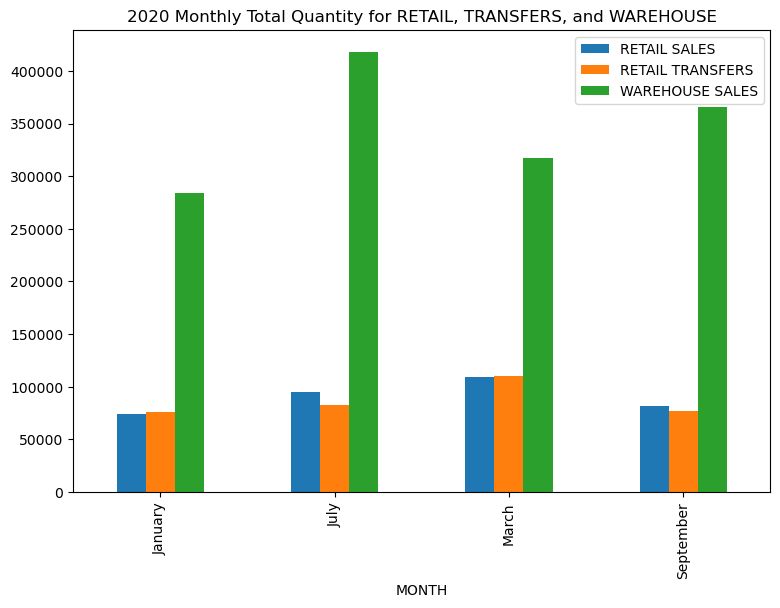

In [51]:
# visulize it

year2020.plot.bar(figsize =(9,6),
        title = ('2020 Monthly Total Quantity for RETAIL, TRANSFERS, and WAREHOUSE'))

* In 2020 Month Warehouse sales had the highest quantity sold
* Retail sales and Retail Transfers have a moderate quantity sold

## General Insight

### What is the total quantity sold in Retail Sales and Warehouse Sales
* The told Quantity sold in Retail Sales for four years is: 2160899.37
* The told Quantity sold in Warehouse Sales for four years is: 7781756.280000001

### What is the average, maximum, and total Quantity sold in Retails Sales
* DUNNAGE and Kegs Items don't have any quantity sold in retail Sales
* Non-alcohol has the highest maximum, Average, and lowest total quantity sold in the retail sale
* Liquor has the highest total and a moderate maximum, average quantity sold in retail sale
* Wine has a higher total quantity and a low maximum quantity with the lowest average sold in the retail sale
* Beer has a moderate average, maximum, and total quantity sold in retail sale
* str_supplies has a lower average,  maximum, and total quantity sold in the retail sale
* Ref has the lowest average, maximum, and total quantity sold in retail sale

### What is the average, maximum, and total Quantity sold in warehouse Sales
* Str_supplies Items don't have any quantity sold in Warehouse Sales
* DUNNAGE and Kegs items sold their quantity in Debit at warehouse sales
* Bear as the highest Average, maximum, and total quantity sold at Warehouse
* The Other item Types contribute low to the Average, maximum, and total quantity sold at the Warehouse

### Yearly Analysis
* 2019 and 2017 had the most hike quantity sold, especially in Warehouse sale
* Retail sales and Retail Transfers have a moderate quantity sold
* 2018 has the lowest quantity sold

### Monthly Analysis
* 2017 has 7 months of supply
* 2018 has only 2 months of supply
* 2019 has 11 months of supply
* 2020 has 4 months of supply
* Trought out the Month and the Year Warehouse as the most quantity sold  


### Recommendations for Improving Inventory Sale Management
* Investigate and reassess the stock levels of products like DUNNAGE, Str_supplies, and KEGS that have negative warehouse sales but no retail sales and warehouse sales and Implement regular reviews of stock turnover for both retail and warehouse channels to ensure better balance in inventory allocation and reduce overstocking.
* Increase the stock supply for Beer, which has consistently high average, maximum, and total sales in the warehouse, and implement advanced analysis techniques such as machine learning algorithm used to forecasting model to anticipate demand surge for hike performing products to adjust warehouse stock accordingly.
* For Item Types like STR_SUPPLIES and REF that have low sales in both retail and warehouse, re-evaluate the stock levels, and pricing strategies, reallocate marketing efforts, and introduce discounts to stimulate sales of underperforming products.
* Products Item Types like Liquor and Wine that have high sales potential in retail should be given a quicker replacement in retail stores to meet demand and avoid stockouts and set up an automated stock replacement to ensure popular products are always available for customers, both in retail and the warehouse.

### Recommendations for Improving Sales Performance Optimization
* Focus efforts on Retail sale item types like Liquor and Non-Alcoholic products that have strong retail performance, and optimize warehouse strategies for products like Beer, which perform better in warehouse sales. Tailor a marketing promotional to channel For instance, increase retail promotions for Liquor and Wine while driving warehouse promotions and bulk offers for Beer.
* Capitalize on high-selling months by running targeted campaigns and stock promotions and offer bulk purchase discounts to drive more sales.
* For Item Types like Liquor that show high total sales but moderate maximum sales, focus on boost promotions to drive further engagement and Introduce seasonal offers, bundle deals, or loyalty rewards to drive higher sales for popular products.
* Implement dynamic pricing for top-performing products based on demand forecasts, and consider discounting or offering incentives on low-demand products like STR_SUPPLIES.
* Look at the factors that contributed to 2018 lowest overall sales drop, and develop a strategy to prevent similar trends in future years.
